In [2]:
# Import necessary data libraries.
import pandas as pd
import os 
import csv
import io
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up URLs.
circuits_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/circuits.csv'
constructor_results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/constructorResults.csv'
constructor_standings_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/constructorStandings.csv'
constructors_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/constructors.csv'
driver_standings_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/driverStandings.csv'
drivers_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/drivers.csv'
lap_times_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/lapTimes.csv'
pit_stop_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/pitStops.csv'
qualifying_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/qualifying.csv'
races_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/races.csv'
results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/results.csv'
seasons_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/seasons.csv'
status_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/status.csv'

In [4]:
# Set up dataframes. Note that both circuits_df and drivers_df ran into errors.
#circuits_df = pd.read_csv(circuits_url, sep = ',', engine = 'python')
constructor_results_df = pd.read_csv(constructor_results_url, sep = ',', engine = 'python')
constructor_standings_df = pd.read_csv(constructor_standings_url, sep = ',', engine = 'python')
constructors_df = pd.read_csv(constructor_standings_url, sep = ',', engine = 'python')
driver_standings_df = pd.read_csv(driver_standings_url, sep = ',', engine = 'python')
lap_times_df = pd.read_csv(lap_times_url, sep = ',', engine = 'python')
pit_stop_df = pd.read_csv(pit_stop_url, sep = ',', engine = 'python')
qualifying_df = pd.read_csv(constructor_standings_url, sep = ',', engine = 'python')
results_df = pd.read_csv(results_url, sep = ',', engine = 'python')
seasons_df = pd.read_csv(seasons_url, sep = ',', engine = 'python')
status_df = pd.read_csv(status_url, sep = ',', engine = 'python')
races_df = pd.read_csv(races_url, sep = ',', engine = 'c')
#drivers_df = pd.read_csv(drivers_url, sep = ',', engine = 'python')

In [65]:
# See status_df.
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [8]:
"""
Just trying to test the creation of a crash or no crash variable
(we can then expand this to include other classes).

Crash statuses: 3, 4, 20, 29, 104

source: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
"""

# Create the variable classID.
status_df['classID0'] = np.where(status_df.statusId == 3, 1, 0)
status_df['classID1'] = np.where(status_df.statusId == 4, 1, status_df.classID0)
status_df['classID2'] = np.where(status_df.statusId == 20, 1, status_df.classID1)
status_df['classID3'] = np.where(status_df.statusId == 29, 1, status_df.classID2)
status_df['classID'] = np.where(status_df.statusId == 104, 1, status_df.classID3)

In [9]:
# Dump any unnecessary variables.
status_df.drop("classID0", axis = 1, inplace = True)
status_df.drop("classID1", axis = 1, inplace = True)
status_df.drop("classID2", axis = 1, inplace = True)
status_df.drop("classID3", axis = 1, inplace = True)

status_df.head()

,statusId,status,classID
0,1,Finished,0
1,2,Disqualified,0
2,3,Accident,1
3,4,Collision,1
4,5,Engine,0


In [10]:
# Check variables in results_df.
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [11]:
# Check variables in status_df.
status_df.head()

,statusId,status,classID
0,1,Finished,0
1,2,Disqualified,0
2,3,Accident,1
3,4,Collision,1
4,5,Engine,0


In [12]:
# Merge results_df with status_df.
final_status = pd.merge(results_df, status_df, on = "statusId")
final_status.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,classID
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,Finished,0
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1,Finished,0
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1,Finished,0
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1,Finished,0
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1,Finished,0


In [13]:
# Find the number of crashes in final_status.
final_status['classID'].sum()

2593

In [14]:
# How many crashes and non-crashes do we have in our dataset?
final_status['classID'].value_counts()

0    21184
1     2593
Name: classID, dtype: int64

In [15]:
# What is the breakdown of each status?
final_status['statusId'].value_counts()

1      6009
11     3314
5      1980
12     1492
81     1025
       ... 
136       1
58        1
59        1
122       1
127       1
Name: statusId, Length: 132, dtype: int64

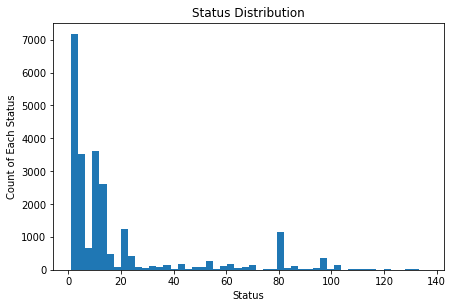

In [16]:
# Plot the distribution of our statuses.
fig = plt.figure(figsize = (7,10))
ax = fig.add_subplot(212)
ax.hist(final_status['statusId'], bins = 50, range = (final_status['statusId'].min(), final_status['statusId'].max()))
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count of Each Status')
plt.show()

In [32]:
wanted_status = [1, 11, 12, 13, 14, 15, 16, 17, 18, 19]
final_status_count = final_status[final_status['statusId'].isin(wanted_status)]
final_status_count.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,classID
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,Finished,0
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1,Finished,0
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1,Finished,0
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1,Finished,0
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1,Finished,0


In [33]:
final_status_count.value_counts("statusId")

statusId
1     6009
11    3314
12    1492
13     719
14     405
15     220
16     152
17      99
18      51
19      38
dtype: int64